In [2]:
import pandas as pd

In [4]:
import seaborn as sns

taken from this link:
https://bioinformatics.stackexchange.com/questions/5642/how-to-plot-a-2d-rna-structure-in-python-using-dot-bracket-input

The goal is to understand the secondary structure of RNA

In [5]:
def dot_bracket_to_pairs(ss_string):
    '''
    Takes dot and bracket string, returns dataframe
    with paired bases.
    If any invalid characters are in the structure, it
    will interpret them as dots, as it only reads parentheses.
    '''
    index_list = []
    pairs = {}

    for index, char in enumerate(ss_string):
        if char == '(':
            index_list.append(index)
        if char == ')':
            try:
                # pair to last item in the list in dictionary
                pairs[index_list.pop()] = index
            except IndexError:
                print(f'Invalid structure, found extra \')\' in position {index}')

    if len(index_list) != 0:
        for item in index_list:
            print(f'Invalid structure, found extra in \'(\' in position {item}')

    df_pairs = pd.DataFrame(pairs.items(), columns=['Y', 'X'])

    return df_pairs

<Axes: xlabel='X', ylabel='Y'>

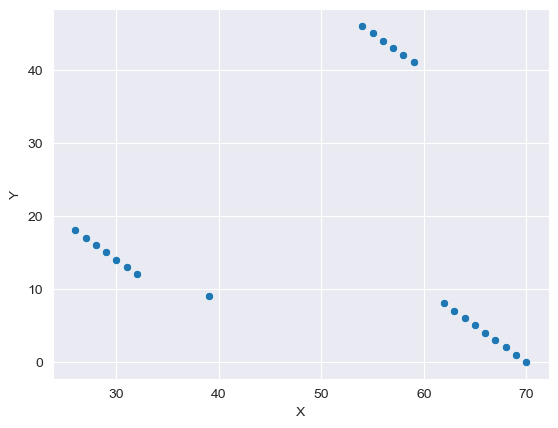

In [6]:
db_string = '((((((((((..(((((((.......)))))))......).((((((.......))))))..)))))))))'
df = dot_bracket_to_pairs(db_string)

sns.scatterplot(data=df, x="X", y="Y")

X is the position of the nucleotide in the input string read from the three prime end and Y is the position of the base in the input string which binds to that X, also read from the three prime end. This graph coresponds to the image secondary_structure_1.png
